In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Load the data
fashion_df = pd.read_csv("mock_fashion_data_uk_us.csv")

fashion_df

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,N9Q4,15.430975,Jigsaw,Footwear,Very Bad,3.967106,197,Streetwear,"S, M, L",M,Blue,Average,27,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,V2T6,81.116542,Alexander McQueen,Outerwear,Not Good,2.844659,473,Formal,"S, M, L",L,Red,Very High,50,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,S7Y1,31.633686,Tommy Hilfiger,Bottoms,Very Good,1.183242,55,Sporty,"M, L, XL",S,Green,Above Average,23,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,K9C7,16.255998,Mulberry,Accessories,Best,3.534252,312,Vintage,"S, L, XL",XL,Green,Very High,37,Cosmopolitan,Olivia Palermo,Winter,Holiday,Positive,Negative,Positive
999996,E5I5,78.555545,Mulberry,Activewear,Best,1.896160,68,Casual,"S, M, L",L,Red,Average,52,Glamour,Kendall Jenner,Spring,Evening,Unknown,Other,Neutral
999997,Y0C9,34.379639,Mulberry,Tops,Not Good,3.168064,237,Casual,"S, M, L",M,Red,High,25,Cosmopolitan,Leandra Medine,Summer,Evening,Neutral,Mixed,Unknown
999998,B1D8,62.343618,Ralph Lauren,Tops,Best,4.764673,53,Sporty,"M, L, XL",S,Red,Above Average,29,W,Olivia Palermo,Spring/Summer,Evening,Positive,Other,Other


In [88]:
#Check the columns datatypes and duplicates
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Product Name                  1000000 non-null  object 
 1   Price                         1000000 non-null  float64
 2   Brand                         1000000 non-null  object 
 3   Category                      1000000 non-null  object 
 4   Description                   1000000 non-null  object 
 5   Rating                        1000000 non-null  float64
 6   Review Count                  1000000 non-null  int64  
 7   Style Attributes              1000000 non-null  object 
 8   Total Sizes                   1000000 non-null  object 
 9   Available Sizes               1000000 non-null  object 
 10  Color                         1000000 non-null  object 
 11  Purchase History              1000000 non-null  object 
 12  Age                          

In [89]:
#Check the statistical summary of the numerical columns
fashion_df.describe()

,Price,Rating,Review Count,Age
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,55.001428,2.998454,249.602431,41.004191
std,25.979720,1.154696,144.362645,13.565907
min,10.000145,1.000000,0.000000,18.000000
25%,32.496717,1.998608,125.000000,29.000000
50%,55.007413,2.996328,249.000000,41.000000
75%,77.511242,3.998479,375.000000,53.000000
max,99.999648,4.999999,499.000000,64.000000


In [90]:
#Check the statistical summary of the numerical columns
fashion_df.Season.value_counts()

Season
Spring           167217
Fall             167194
Winter           166878
Fall/Winter      166748
Spring/Summer    166101
Summer           165862
Name: count, dtype: int64

In [91]:
#Check the unique count of values of each column in the dataset
fashion_df.nunique()

Product Name                      67600
Price                           1000000
Brand                                 8
Category                             10
Description                           7
Rating                          1000000
Review Count                        500
Style Attributes                     10
Total Sizes                           3
Available Sizes                       4
Color                                 4
Purchase History                     10
Age                                  47
Fashion Magazines                    10
Fashion Influencers                  10
Season                                6
Time Period Highest Purchase          5
Customer Reviews                      5
Social Media Comments                 6
feedback                              6
dtype: int64

In [92]:
# Count the unique product columns
unique_products_count = fashion_df["Product Name"].nunique()

print("Number of unique product columns:", unique_products_count)


Number of unique product columns: 67600


In [93]:
# Check for duplicates
duplicates = fashion_df.duplicated()
if duplicates.any():
    print("Warning: Duplicates found in the data. Removing duplicates...")
    fashion_df = data.drop_duplicates()
    print("Duplicates removed.")
    
else: print("No duplicates found in the data. You may proceed with your analysis.")

No duplicates found in the data. You may proceed with your analysis.


In [94]:
# Group by style and season, and calculate the sum of prices
summary = fashion_df.groupby(["Style Attributes", "Season"])["Price"].sum().reset_index()

# Print the summary
print("Sum of Prices by Style in Each Season:\n")
print(summary)


Sum of Prices by Style in Each Season:

   Style Attributes         Season          Price
0          Bohemian           Fall  913577.136515
1          Bohemian    Fall/Winter  926871.553838
2          Bohemian         Spring  917142.890241
3          Bohemian  Spring/Summer  917066.346872
4          Bohemian         Summer  907574.856034
5          Bohemian         Winter  915372.139590
6            Casual           Fall  927381.872978
7            Casual    Fall/Winter  919952.117802
8            Casual         Spring  913029.567732
9            Casual  Spring/Summer  889970.303385
10           Casual         Summer  924873.188052
11           Casual         Winter  924194.823516
12             Edgy           Fall  914618.364940
13             Edgy    Fall/Winter  918481.229406
14             Edgy         Spring  931740.057720
15             Edgy  Spring/Summer  915856.838062
16             Edgy         Summer  913746.830696
17             Edgy         Winter  907730.241591
18        

In [95]:
# Create a pivot table to summarize the sum of prices by style in each season
pivot_table = pd.pivot_table(fashion_df, values="Price", index="Style Attributes", columns="Season", aggfunc="sum")

# Print the pivot table
print("Sum of Prices by Style in Each Season (Pivot Table):\n")
print(pivot_table)


Sum of Prices by Style in Each Season (Pivot Table):

Season                     Fall    Fall/Winter         Spring  Spring/Summer   
Style Attributes                                                               
Bohemian          913577.136515  926871.553838  917142.890241  917066.346872  \
Casual            927381.872978  919952.117802  913029.567732  889970.303385   
Edgy              914618.364940  918481.229406  931740.057720  915856.838062   
Formal            915090.467160  905467.485114  907001.123160  929446.885916   
Glamorous         920549.030697  925132.473665  913206.769403  899963.005317   
Minimalist        930233.809434  920354.083628  923369.572983  909406.431214   
Preppy            915903.000536  918703.917254  917398.233929  912808.475837   
Sporty            914181.135504  920037.857336  918027.505260  907608.617193   
Streetwear        918595.476741  905498.525587  922330.996970  930859.600047   
Vintage           931046.381021  903665.581202  925260.062987  912

In [96]:
# Create a pivot table to summarize the count of products by style in each season
pivot_table = pd.pivot_table(fashion_df, values="Product Name", index="Style Attributes", columns="Season", aggfunc="count", fill_value=0)

# Print the pivot table
print("Count of Products by Style in Each Season (Pivot Table):\n")
print(pivot_table)



Count of Products by Style in Each Season (Pivot Table):

Season             Fall  Fall/Winter  Spring  Spring/Summer  Summer  Winter
Style Attributes                                                           
Bohemian          16584        16841   16699          16726   16629   16733
Casual            16885        16684   16615          16295   16774   16677
Edgy              16660        16696   16887          16644   16543   16529
Formal            16650        16535   16552          16905   16588   16758
Glamorous         16712        16894   16570          16327   16444   16841
Minimalist        16828        16660   16845          16587   16609   16523
Preppy            16638        16660   16656          16577   16628   16793
Sporty            16606        16733   16726          16505   16596   16710
Streetwear        16760        16512   16775          16937   16311   16747
Vintage           16871        16533   16892          16598   16740   16567


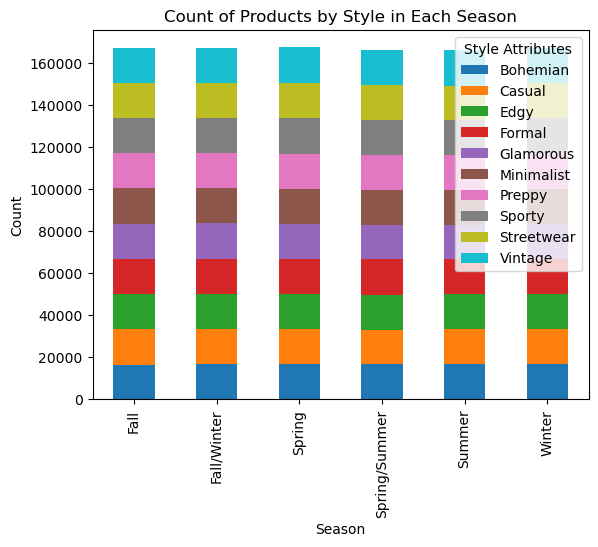

In [97]:
# Create a pivot table to summarize the count of products by style in each season
pivot_table = pd.pivot_table(fashion_df, values="Product Name", index="Season", columns="Style Attributes", aggfunc="count", fill_value=0)

# Plot a stacked bar chart
pivot_table.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Count of Products by Style in Each Season")

# Show the chart
plt.show()


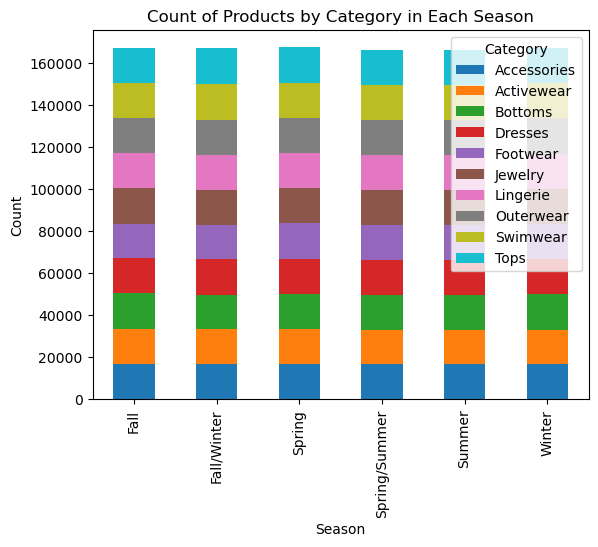

In [112]:
# Create a pivot table to summarize the count of products by style in each season
pivot_table = pd.pivot_table(fashion_df, values="Product Name", index="Season", columns="Category", aggfunc="count", fill_value=0)

# Plot a stacked bar chart
pivot_table.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Count of Products by Category in Each Season")

# Show the chart
plt.show()


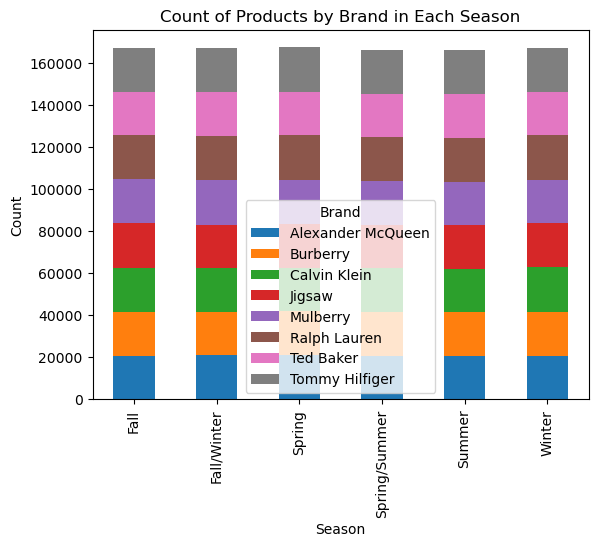

In [113]:
# Create a pivot table to summarize the count of products by style in each season
pivot_table = pd.pivot_table(fashion_df, values="Product Name", index="Season", columns="Brand", aggfunc="count", fill_value=0)

# Plot a stacked bar chart
pivot_table.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Count of Products by Brand in Each Season")

# Show the chart
plt.show()


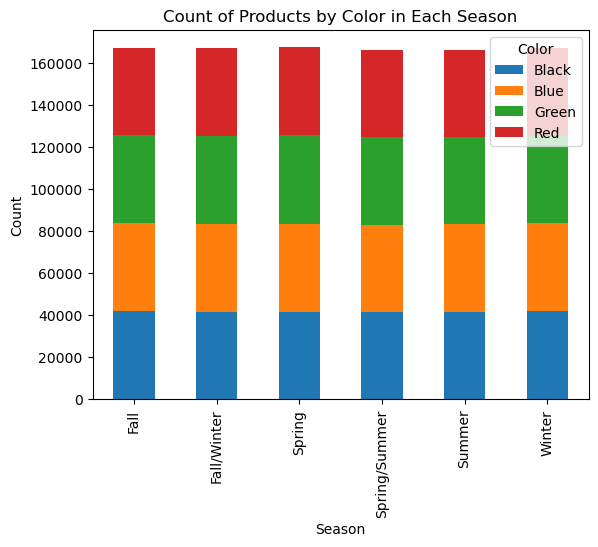

In [114]:
# Create a pivot table to summarize the count of products by style in each season
pivot_table = pd.pivot_table(fashion_df, values="Product Name", index="Season", columns="Color", aggfunc="count", fill_value=0)

# Plot a stacked bar chart
pivot_table.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Count of Products by Color in Each Season")

# Show the chart
plt.show()


In [103]:
# Summarize the sum of product prices by influencers
influencer_prices = fashion_df.groupby("Fashion Influencers")["Price"].sum()

# Print the summary
print(influencer_prices)

Fashion Influencers
Aimee Song         5.482066e+06
Camila Coelho      5.516418e+06
Chiara Ferragni    5.514986e+06
Gigi Hadid         5.515692e+06
Julie Sariñana     5.473694e+06
Kendall Jenner     5.496351e+06
Leandra Medine     5.522204e+06
Negin Mirsalehi    5.483259e+06
Olivia Palermo     5.503667e+06
Song of Style      5.493090e+06
Name: Price, dtype: float64


In [104]:
fashion_df[['Season','Product Name']].groupby('Season').agg({'Product Name':'count'})

,Product Name
Season,
Fall,167194
Fall/Winter,166748
Spring,167217
Spring/Summer,166101
Summer,165862
Winter,166878
